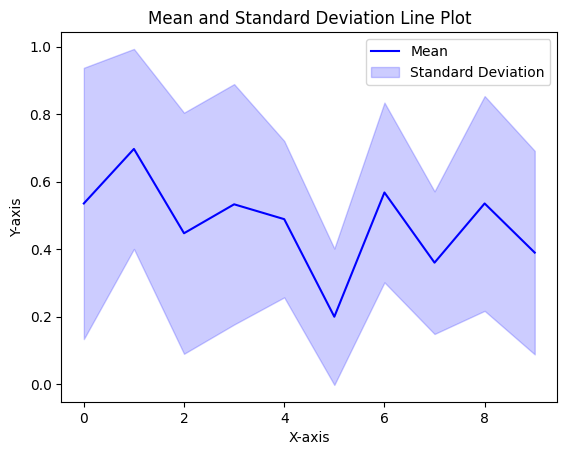

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Sample data: List of numpy arrays
data = [np.random.random(10) for _ in range(5)]  # Replace this with your actual data

# Convert list of numpy arrays to a 2D numpy array
data_stack = np.vstack(data)

# Calculate the mean and standard deviation
mean = np.mean(data_stack, axis=0)
std = np.std(data_stack, axis=0)

# Create x values for the plot (assuming equal spacing)
x = np.arange(mean.shape[0])

# Plot the mean line
plt.plot(x, mean, label='Mean', color='blue')

# Plot the standard deviation as a shaded region
plt.fill_between(x, mean - std, mean + std, color='blue', alpha=0.2, label='Standard Deviation')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Mean and Standard Deviation Line Plot')
plt.legend()

# Show the plot
plt.show()


In [55]:
from typing import List, Tuple

PARENT_FOLDER = os.path.join('Experiments','SF_MAP')

def get_rewards_array(parent_folder: str, algorithm: str, probability_decimal: int, seed: int) -> np.ndarray:
    path = os.path.join(parent_folder, algorithm, f'Test_runp_0{probability_decimal}', f'{seed}', 'Results', 'rewards_rm.npy')
    return np.load(path)

def get_alpha_array(parent_folder: str, algorithm: str, probability_decimal: int, seed: int) -> np.ndarray:
    path = os.path.join(parent_folder, algorithm, f'Test_runp_0{probability_decimal}', f'{seed}', 'Checkpoints', 'alphas.npy')
    return np.load(path)

def get_rewards_arrays_for_algorithm(parent_folder: str, algorithm: str, probability_decimal: int, seeds: List[int]) -> List[np.ndarray]:
    rewards_arrays = [get_rewards_array(parent_folder, algorithm, probability_decimal, seed) for seed in seeds]
    return rewards_arrays

def get_alpha_arrays_for_algorithm(parent_folder: str, algorithm: str, probability_decimal: int, seeds: List[int]) -> List[np.ndarray]:
    alpha_arrays = [get_alpha_array(parent_folder, algorithm, probability_decimal, seed) for seed in seeds]
    return alpha_arrays

def compute_mean_and_std(data: List[np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    data_stack = np.vstack(data)
    mean = np.mean(data_stack, axis=0)
    std = np.std(data_stack, axis=0)
    std = std / np.sqrt(len(data))
    return mean, std

def plot_mean_and_std(
    means: List[np.ndarray], stds: List[np.ndarray], algorithm_names: List[str], probability: float,
    colors: List[str] = ['green', 'blue', 'purple']
) -> None:
    x = np.arange(means[0].shape[0])

    for i in range(len(means)):
        plt.plot(x, means[i], label=algorithm_names[i], color=colors[i])
        plt.fill_between(x, means[i] - stds[i], means[i] + stds[i], color=colors[i], alpha=0.2)

    plt.xlabel('Episodes')
    plt.ylabel('Total Expected Return')
    plt.title(f'SF Map (p={probability})')
    plt.grid('True')
    plt.legend()
    # plt.show()

def get_seeds(parent_folder: str, algorithm: str, probability_decimal: int) -> List[int]:
    seeds = [int(seed) for seed in os.listdir(os.path.join(parent_folder, algorithm, f'Test_runp_0{probability_decimal}'))
             if os.path.isdir(os.path.join(parent_folder, algorithm, f'Test_runp_0{probability_decimal}', seed))]
    return seeds

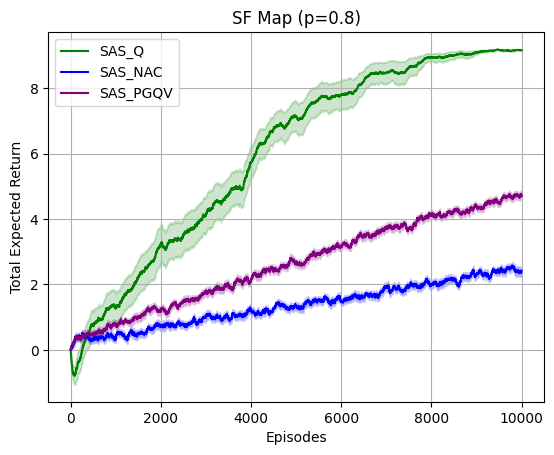

In [56]:
probability_decimal = 8
algorithm_name1 = 'SAS_Q'
seeds = get_seeds(PARENT_FOLDER, algorithm_name1, probability_decimal)
rewards = get_rewards_arrays_for_algorithm(PARENT_FOLDER, algorithm_name1, probability_decimal, seeds)
mean_sas_q, std_sas_q = compute_mean_and_std(rewards)

algorithm_name2= 'SAS_NAC'
rewards = get_rewards_arrays_for_algorithm(PARENT_FOLDER, algorithm_name2, probability_decimal, seeds)
mean_sas_n, std_sas_n = compute_mean_and_std(rewards)

algorithm_name3= 'SAS_PGQV'
rewards = get_rewards_arrays_for_algorithm(PARENT_FOLDER, algorithm_name3, probability_decimal, seeds)
mean_sas_p, std_sas_p = compute_mean_and_std(rewards)

plot_mean_and_std([mean_sas_q,mean_sas_n,mean_sas_p], [std_sas_q,std_sas_n,std_sas_p], [algorithm_name1,algorithm_name2,algorithm_name3], probability_decimal/10)

In [4]:
alphas = np.load('/Users/matte/Documents/GitHub/SAS_RL/SAS_RL/Experiments/SF_Map/SAS_PGQV/Test_runp_02/0/Checkpoints/alphas.npy')
alphas.shape

(10001, 2)

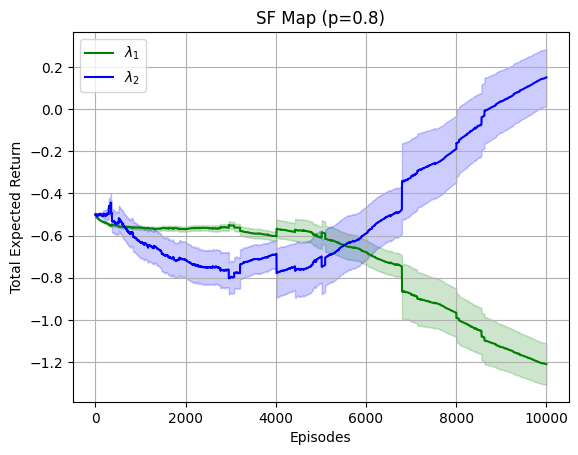

In [5]:
probability_decimal = 8
algorithm_name = 'SAS_PGQV'
seeds = get_seeds(PARENT_FOLDER, algorithm_name, probability_decimal)
alphas = get_alpha_arrays_for_algorithm(PARENT_FOLDER, algorithm_name, probability_decimal, seeds)
alpha_1 = []
alpha_2 = []
for i in alphas:
    alpha_1.append(i[:,0])
    alpha_2.append(i[:,1])

mean1, std1 = compute_mean_and_std(alpha_1)
mean2, std2 = compute_mean_and_std(alpha_2)

plot_mean_and_std([mean1,mean2], [std1,std2], ['$\lambda_1$','$\lambda_2$'], probability_decimal/10)

In [36]:
probabilities = [2,4,6,8]
algorithms = ['SAS_PGQV','SAS_NAC','SAS_Q']
bests =[]
stds = [] 
for algorithm_name in algorithms:
    best_values = []
    std_devs = []
    for probability_decimal in probabilities:
        seeds = get_seeds(PARENT_FOLDER, algorithm_name, probability_decimal)
        rewards = get_rewards_arrays_for_algorithm(PARENT_FOLDER, algorithm_name, probability_decimal, seeds)
        trials = []
        for i in rewards:
            trials.append(i[-1])
        best_values.append(np.max(trials))
        _, std = compute_mean_and_std(trials)
        std_devs.append(std[0])
    
    bests.append(best_values)
    stds.append(std_devs)


In [38]:
best_1 = bests[0]
std_algo1 = stds[0]

best_2 = bests[1]
std_algo2 = stds[1]

best_3 = bests[2]
std_algo3 = stds[2]

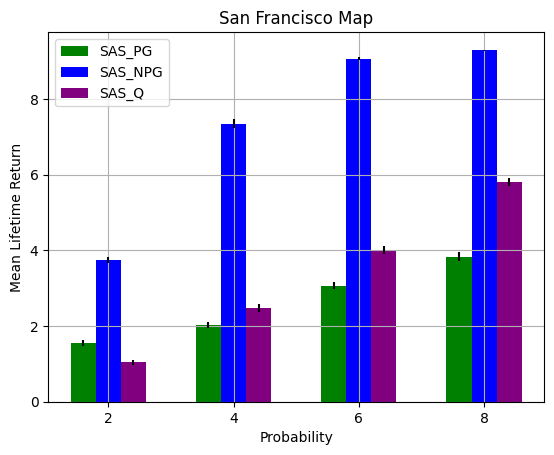

In [53]:
# Number of bars
n_algorithms = 3
bar_width = 0.2

# Bar positions
bar_positions = np.arange(len(probabilities))

# Adjust bar positions for each algorithm
bar_positions_algo2 = bar_positions - bar_width
bar_positions_algo3 = bar_positions
bar_positions_algo1 = bar_positions + bar_width

# Plotting the bar chart
fig, ax = plt.subplots()

# Plot bars with error bars for each algorithm

ax.bar(bar_positions_algo2, best_2, yerr=std_algo2, width=bar_width, color='green', label='SAS_PG')
ax.bar(bar_positions_algo3, best_3, yerr=std_algo3, width=bar_width, color='blue', label='SAS_NPG')
ax.bar(bar_positions_algo1, best_1, yerr=std_algo1, width=bar_width, color='purple', label='SAS_Q')

# Adding labels and title
ax.set_xlabel('Probability')
ax.set_ylabel('Mean Lifetime Return')
ax.set_title('San Francisco Map')
ax.set_xticks(bar_positions)
ax.set_xticklabels(probabilities)

# Add legend
ax.legend()
ax.grid('True')
# Show plot
plt.show()

In [69]:
for i in range(2, 31):
    print(i, len(get_rewards_array(PARENT_FOLDER, algorithm_names[j], 6, i)))

2 20000
3 20000
4 20000
5 20000
6 20000
7 20000
8 86
9 20000
10 272
11 122
12 20000
13 20000
14 20000
15 166
16 20000
17 20000
18 20000
19 20000
20 20000
21 20000
22 33
23 20000
24 120
25 20000
26 43
27 20000
28 174
29 20000
30 114


In [68]:
len(get_rewards_array(PARENT_FOLDER, algorithm_names[j], 4, 32))

20000

In [44]:
probability_decimal = 2
algorithm_name = 'SAS_NAC'
seeds = get_seeds(PARENT_FOLDER, algorithm_name, probability_decimal)
rewards = get_rewards_arrays_for_algorithm(PARENT_FOLDER, algorithm_name, probability_decimal, seeds)
mean, std = compute_mean_and_std(rewards)


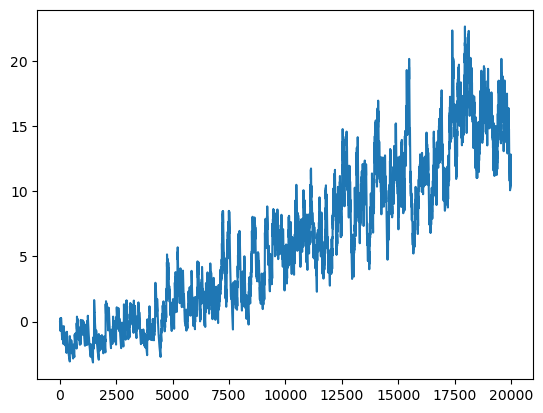

In [47]:
plt.plot(rewards[0])